# Case study for the alpha-stable distribution 

We will now use veriues network arichtetures to learn the summary statisitics for the multi-variate $\alpha$-stable distribution. The network archtitures that we will consider are: MLP, MLP with data pre-processing, and DeepSets.

#### The multivariate alpha stabel distribution 

### Setup

┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[1]:8
└ @ Core In[1]:8
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[1]:9
└ @ Core In[1]:9
┌ Warning: `getindex(o::PyObject, s::AbstractString)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o."s"` instead of `o["s"]`.
│   caller = top-level scope at In[1]:10
└ @ Core In[1]:10


Loading alpha-stable model


┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/MKiwM/src/CSV.jl:157
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[1]:28
└ @ Core In[1]:28


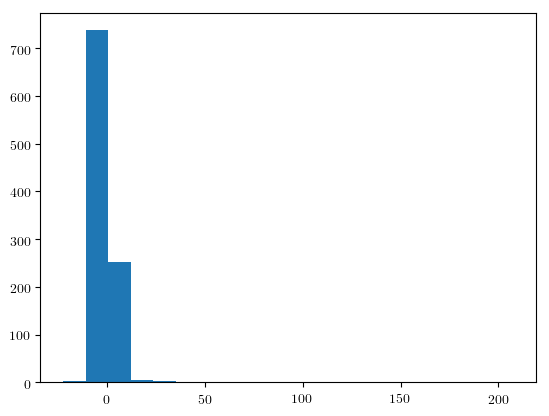

In [1]:
# set path
cd("..") # set correct working directory 
pwd() # this path should go to the folder with the .git file 

# load packages
using Pkg
using PyCall 
PyDict(pyimport("matplotlib")["rcParams"])["ps.useafm"] = [true]
PyDict(pyimport("matplotlib")["rcParams"])["pdf.use14corefonts"] = [true]
PyDict(pyimport("matplotlib")["rcParams"])["text.usetex"] = [true]
using PyPlot 
using DataFrames
using CSV
using Distributions
using KernelDensity 

# include files
include(pwd()*"/src/alpha stable dist/set_up.jl")

# load data
y_test = Matrix(CSV.read("data/alpha stable/y_test.csv"; allowmissing=:auto));

#for i = 1:size(y_test,1)
#    y_test[i,:] = map_parameters(y_test[i,:])
#end

PyPlot.figure()
h = PyPlot.plt[:hist](y_obs,20);

# calc grid for prior dist
grid_prior = -5:0.01:5

# calc prior dist
priordensity = pdf.(Normal(0,1), grid_prior);

## Network performance

### Results using standard ABC

Load results 

In [2]:
posterior_summary_stats = Matrix(CSV.read("data/alpha stable/abcrs_post.csv"; allowmissing=:auto));

┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/MKiwM/src/CSV.jl:157


#### Posterior inference  

In [8]:
h1 = kde(posterior_summary_stats[:,1]; boundary=(1.1,2))
h2 = kde(posterior_summary_stats[:,2]; boundary=(-1,1))
h3 = kde(posterior_summary_stats[:,3])
h4 = kde(posterior_summary_stats[:,4])

PyPlot.figure(figsize=(10,8))
PyPlot.subplot(221)
PyPlot.plot(h1.x,h1.density, "b")
#PyPlot.plot(x_grid1,priordensity1, "g")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1.density)), "k")
PyPlot.xlabel(L"$α$")
PyPlot.subplot(222)
#PyPlot.plot(x_grid2,priordensity2, "g")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2.density)), "k")
PyPlot.xlabel(L"$β$")
PyPlot.subplot(223)
PyPlot.plot(h3.x,h3.density, "b")
#PyPlot.plot(x_grid3,priordensity3, "g")
PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3.density)), "k")
PyPlot.xlabel(L"$γ$")
PyPlot.subplot(224)
#PyPlot.plot(x_grid4,priordensity4, "g")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4.density)), "k")
PyPlot.xlabel(L"$δ$");


PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= /home/samuel/.julia/packages/PyCall/ttONZ/src/pyfncall.jl:44 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'UnicodeEncodeError'>
UnicodeEncodeError('ascii', '\n\\documentclass{article}\n\\usepackage{type1cm}\n\n\n\n\\usepackage{textcomp}\n\n\n\\usepackage[papersize={72in,72in},body={70in,70in},margin={1in,1in}]{geometry}\n\\pagestyle{empty}\n\\begin{document}\n\\fontsize{10.000000}{12.500000}{\\sffamily $α$}\n\\end{document}\n', 230, 231, 'ordinal not in range(128)')
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py", line 710, in savefig
    res = fig.savefig(*args, **kwargs)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py", line 2035, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/backend_bases.py", line 2263, in print_figure
    **kwargs)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_pdf.py", line 2586, in print_pdf
    self.figure.draw(renderer)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py", line 55, in draw_wrapper
    return draw(artist, renderer, *args, **kwargs)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py", line 1475, in draw
    renderer, self, artists, self.suppressComposite)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/image.py", line 141, in _draw_list_compositing_images
    a.draw(renderer)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py", line 55, in draw_wrapper
    return draw(artist, renderer, *args, **kwargs)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py", line 2607, in draw
    mimage._draw_list_compositing_images(renderer, self, artists)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/image.py", line 141, in _draw_list_compositing_images
    a.draw(renderer)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py", line 55, in draw_wrapper
    return draw(artist, renderer, *args, **kwargs)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/axis.py", line 1204, in draw
    self.label.draw(renderer)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/artist.py", line 55, in draw_wrapper
    return draw(artist, renderer, *args, **kwargs)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/text.py", line 706, in draw
    bbox, info, descent = textobj._get_layout(renderer)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/text.py", line 309, in _get_layout
    ismath=ismath)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/backends/backend_pdf.py", line 2148, in get_text_width_height_descent
    renderer=self)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/texmanager.py", line 501, in get_text_width_height_descent
    dvifile = self.make_dvi(tex, fontsize)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/texmanager.py", line 361, in make_dvi
    texfile = self.make_tex(tex, fontsize)
  File "/home/samuel/anaconda3/lib/python3.6/site-packages/matplotlib/texmanager.py", line 259, in make_tex
    fh.write(s.encode('ascii'))


In [9]:
pwd()

"/home/samuel/Documents/projects/ABC with deep learning/code"

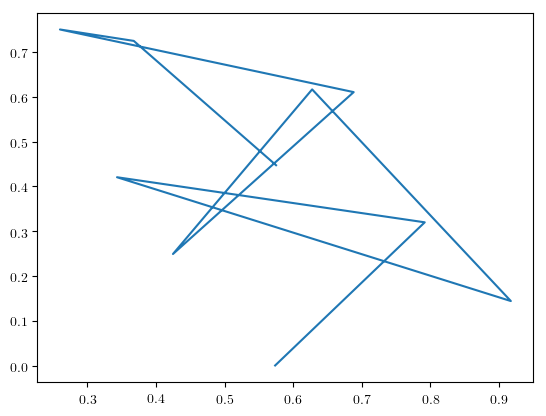

In [10]:
PyPlot.figure()
PyPlot.plot(rand(10), rand(10))
PyPlot.savefig("figures/test.pdf", format="pdf", dpi=1000)

Plot posterior for transformed parameters. 

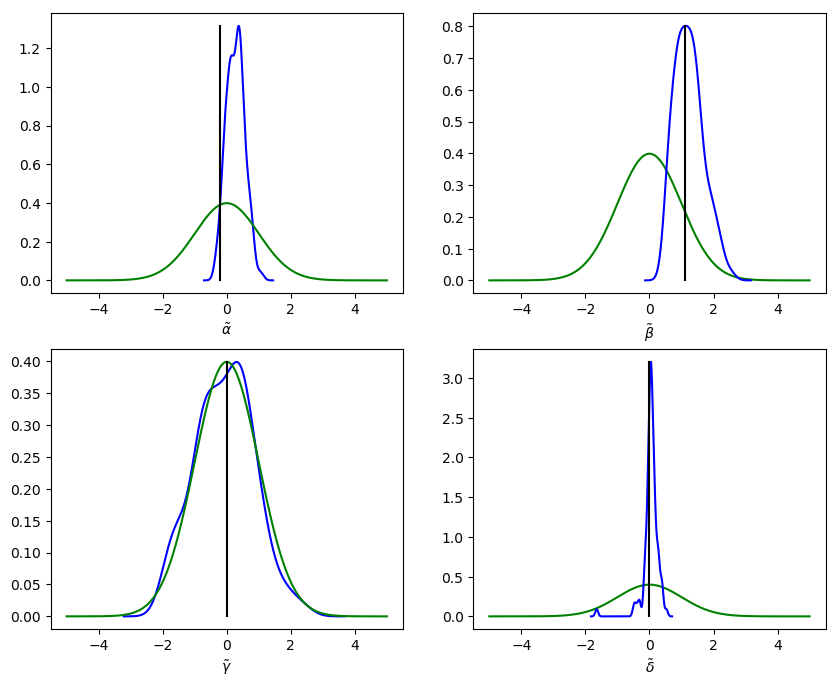

In [4]:
posterior_summary_stats_tilde = zeros(size(posterior_summary_stats))

for i = 1:size(posterior_summary_stats,1)
    posterior_summary_stats_tilde[i,:] = map_parameters(posterior_summary_stats[i,:])
end

θ_true_tilde = map_parameters(θ_true);

h1 = kde(posterior_summary_stats_tilde[:,1])
h2 = kde(posterior_summary_stats_tilde[:,2])
h3 = kde(posterior_summary_stats_tilde[:,3])
h4 = kde(posterior_summary_stats_tilde[:,4])


PyPlot.figure(figsize=(10,8))
PyPlot.subplot(221)
PyPlot.plot(h1.x,h1.density, "b")
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot((θ_true_tilde[1], θ_true_tilde[1]), (0, maximum(h1.density)), "k")
PyPlot.xlabel(L"$\tilde{α}$")
PyPlot.subplot(222)
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot((θ_true_tilde[2], θ_true_tilde[2]), (0, maximum(h2.density)), "k")
PyPlot.xlabel(L"$\tilde{β}$")
PyPlot.subplot(223)
PyPlot.plot(h3.x,h3.density, "b")
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot((θ_true_tilde[3], θ_true_tilde[3]), (0, maximum(h3.density)), "k")
PyPlot.xlabel(L"$\tilde{γ}$")
PyPlot.subplot(224)
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot((θ_true_tilde[4], θ_true_tilde[4]), (0, maximum(h4.density)), "k")
PyPlot.xlabel(L"$\tilde{δ}$");

### Results using MLP

#### Network info

Structure: 1000 (input) -> 1000 -> 1000 -> 500 -> 4 (output)

Number weights: 2504504

Training time: 6258.06 sec. (1.74 h)

ABC runtime: 194.37 sec. (3.24 min.)

Load results. 

In [8]:
loss_training_mlp = Matrix(CSV.read("data/alpha stable/loss_vec_training_simple_DNN_small_1.csv"; allowmissing=:auto))
loss_val_mlp = Matrix(CSV.read("data/alpha stable/loss_vec_val_simple_DNN_small_1.csv"; allowmissing=:auto))
predictions_mlp = Matrix(CSV.read("data/alpha stable/predictions_simple_DNN_small_1.csv"; allowmissing=:auto))
posterior_mlp = Matrix(CSV.read("data/alpha stable/abcrs_post_simple_DNN_small_1.csv"; allowmissing=:auto));

#### Network performance  

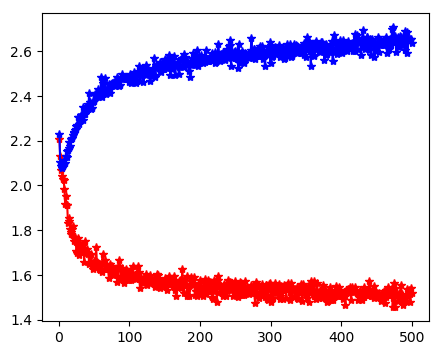

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe920896438>

In [9]:
# plot training and val error
PyPlot.figure(figsize=(5,4))
PyPlot.plot(1:length(loss_training_mlp), loss_training_mlp[:], "*-r")
PyPlot.plot(1:length(loss_training_mlp), loss_val_mlp[:], "*-b")


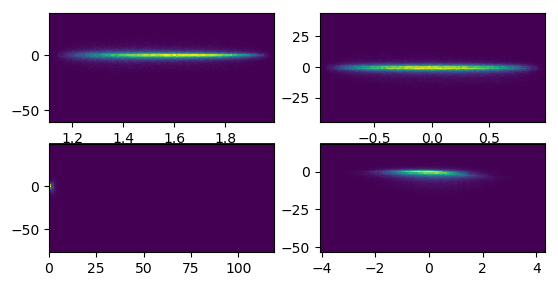

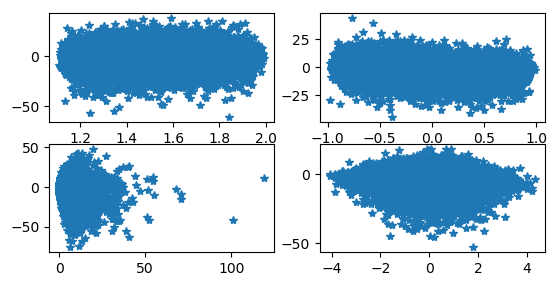

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe92119f160>

In [10]:
# plot predictions
PyPlot.figure()
PyPlot.subplot(321)
PyPlot.plt[:hist2d](y_test[:,1], predictions_mlp[:,1], bins=(100, 100))
PyPlot.subplot(322)
PyPlot.plt[:hist2d](y_test[:,2], predictions_mlp[:,2], bins=(100, 100))
PyPlot.subplot(323)
PyPlot.plt[:hist2d](y_test[:,3], predictions_mlp[:,3], bins=(100, 100))
PyPlot.subplot(324)
PyPlot.plt[:hist2d](y_test[:,4], predictions_mlp[:,4], bins=(100, 100))

# plot predictions
PyPlot.figure()
PyPlot.subplot(321)
PyPlot.plot(y_test[:,1], predictions_mlp[:,1], "*")
PyPlot.subplot(322)
PyPlot.plot(y_test[:,2], predictions_mlp[:,2], "*")
PyPlot.subplot(323)
PyPlot.plot(y_test[:,3], predictions_mlp[:,3], "*")
PyPlot.subplot(324)
PyPlot.plot(y_test[:,4], predictions_mlp[:,4], "*")


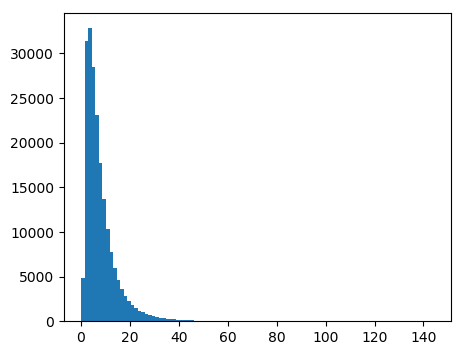

In [12]:
# check pred error
loss_test = sqrt.(sum((predictions_mlp - y_test).^2, dims=2))

PyPlot.figure(figsize=(5,4))
h = PyPlot.plt[:hist](loss_test,100);


#### Posterior inference  

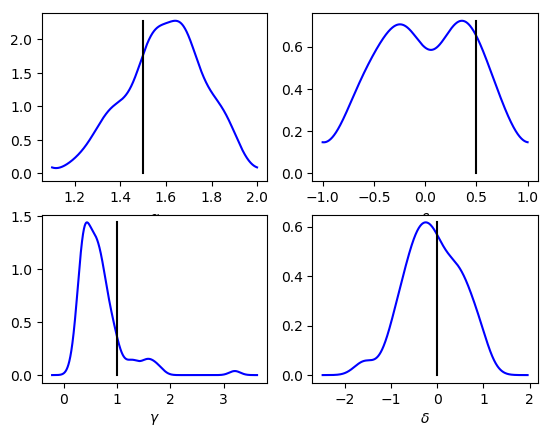

In [13]:
h1 = kde(posterior_mlp[:,1]; boundary=(1.1,2))
h2 = kde(posterior_mlp[:,2]; boundary=(-1,1))
h3 = kde(posterior_mlp[:,3])
h4 = kde(posterior_mlp[:,4])

PyPlot.figure()
PyPlot.subplot(221)
PyPlot.plot(h1.x,h1.density, "b")
#PyPlot.plot(x_grid1,priordensity1, "g")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1.density)), "k")
PyPlot.xlabel(L"$α$")
PyPlot.subplot(222)
#PyPlot.plot(x_grid2,priordensity2, "g")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2.density)), "k")
PyPlot.xlabel(L"$β$")
PyPlot.subplot(223)
PyPlot.plot(h3.x,h3.density, "b")
#PyPlot.plot(x_grid3,priordensity3, "g")
PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3.density)), "k")
PyPlot.xlabel(L"$γ$")
PyPlot.subplot(224)
#PyPlot.plot(x_grid4,priordensity4, "g")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4.density)), "k")
PyPlot.xlabel(L"$δ$");


Plot posterior for transformed parameters. 

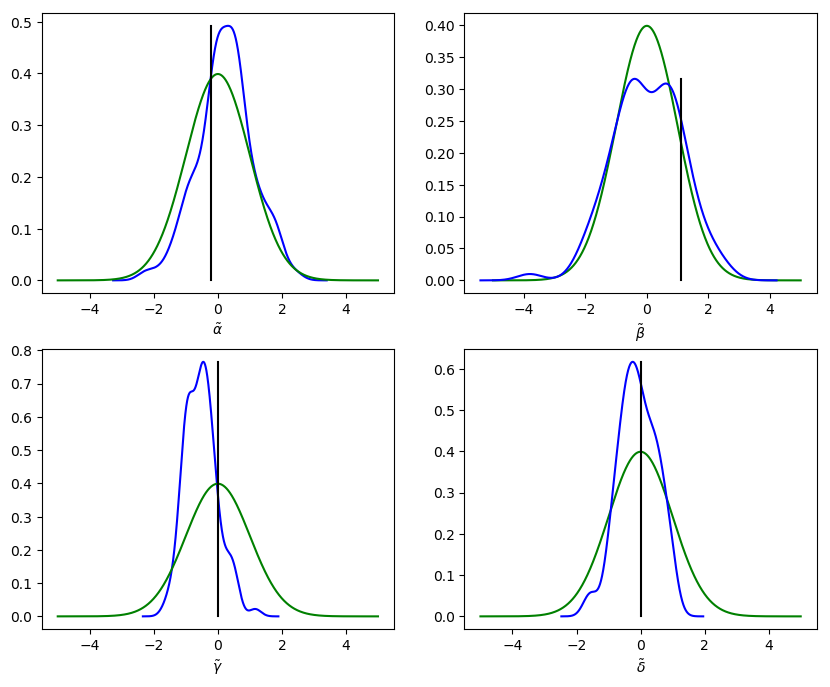

In [14]:
posterior_mlp_tilde = zeros(size(posterior_mlp))

for i = 1:size(posterior_mlp,1)
    posterior_mlp_tilde[i,:] = map_parameters(posterior_mlp[i,:])
end

h1 = kde(posterior_mlp_tilde[:,1])
h2 = kde(posterior_mlp_tilde[:,2])
h3 = kde(posterior_mlp_tilde[:,3])
h4 = kde(posterior_mlp_tilde[:,4])


PyPlot.figure(figsize=(10,8))
PyPlot.subplot(221)
PyPlot.plot(h1.x,h1.density, "b")
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot((θ_true_tilde[1], θ_true_tilde[1]), (0, maximum(h1.density)), "k")
PyPlot.xlabel(L"$\tilde{α}$")
PyPlot.subplot(222)
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot((θ_true_tilde[2], θ_true_tilde[2]), (0, maximum(h2.density)), "k")
PyPlot.xlabel(L"$\tilde{β}$")
PyPlot.subplot(223)
PyPlot.plot(h3.x,h3.density, "b")
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot((θ_true_tilde[3], θ_true_tilde[3]), (0, maximum(h3.density)), "k")
PyPlot.xlabel(L"$\tilde{γ}$")
PyPlot.subplot(224)
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot((θ_true_tilde[4], θ_true_tilde[4]), (0, maximum(h4.density)), "k")
PyPlot.xlabel(L"$\tilde{δ}$");

### Results using MLP w. data preprocessing (timeseries)

#### Network info

Structure: 100 (input) -> 1000 -> 1000 -> 500 -> 4 (output)

Number weights: 25454 

Training time: 2097.84 sec. (34.95 min)

ABC runtime: 15.23 sec. (0.25 min)

Load results. 

In [15]:
loss_training_dnn_timseries_data = Matrix(CSV.read("data/alpha stable/loss_vec_training_dnn_timseries_data_1.csv"; allowmissing=:auto))
loss_val_dnn_timseries_data = Matrix(CSV.read("data/alpha stable/loss_vec_val_dnn_timseries_data_1.csv"; allowmissing=:auto))
predictions_dnn_timseries_data = Matrix(CSV.read("data/alpha stable/predictions_dnn_timseries_data_1.csv"; allowmissing=:auto))
posterior_timeseries_data = Matrix(CSV.read("data/alpha stable/abcrs_post_dnn_timseries_data_1.csv"; allowmissing=:auto));

#### Network performance  

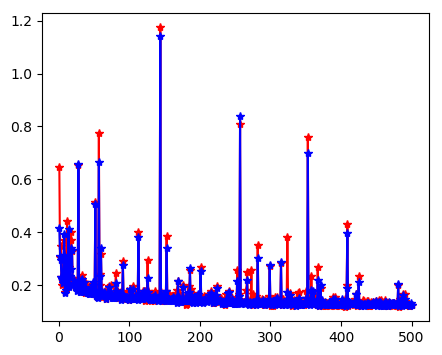

In [16]:
# plot training and val error
PyPlot.figure(figsize=(5,4))
PyPlot.plot(1:length(loss_training_dnn_timseries_data), loss_training_dnn_timseries_data[:], "*-r")
PyPlot.plot(1:length(loss_training_dnn_timseries_data), loss_val_dnn_timseries_data[:], "*-b");

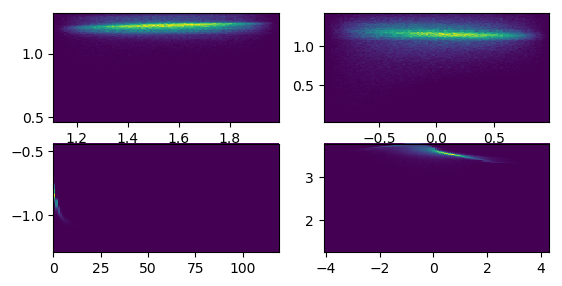

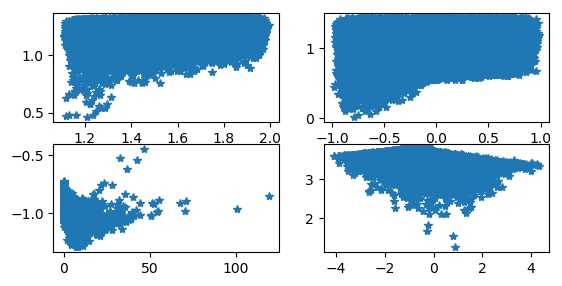

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe91fe1ee10>

In [17]:
# plot predictions
# plot predictions
PyPlot.figure()
PyPlot.subplot(321)
PyPlot.plt[:hist2d](y_test[:,1], predictions_dnn_timseries_data[:,1], bins=(100, 100))
PyPlot.subplot(322)
PyPlot.plt[:hist2d](y_test[:,2], predictions_dnn_timseries_data[:,2], bins=(100, 100))
PyPlot.subplot(323)
PyPlot.plt[:hist2d](y_test[:,3], predictions_dnn_timseries_data[:,3], bins=(100, 100))
PyPlot.subplot(324)
PyPlot.plt[:hist2d](y_test[:,4], predictions_dnn_timseries_data[:,4], bins=(100, 100))

# plot predictions
PyPlot.figure()
PyPlot.subplot(321)
PyPlot.plot(y_test[:,1], predictions_dnn_timseries_data[:,1], "*")
PyPlot.subplot(322)
PyPlot.plot(y_test[:,2], predictions_dnn_timseries_data[:,2], "*")
PyPlot.subplot(323)
PyPlot.plot(y_test[:,3], predictions_dnn_timseries_data[:,3], "*")
PyPlot.subplot(324)
PyPlot.plot(y_test[:,4], predictions_dnn_timseries_data[:,4], "*")


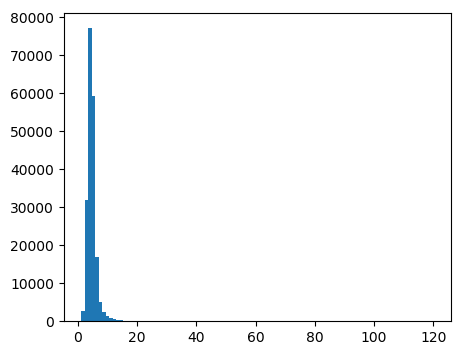

In [18]:
# check pred error
loss_test = sqrt.(sum((predictions_dnn_timseries_data - y_test).^2, dims=2))

PyPlot.figure(figsize=(5,4))
h = PyPlot.plt[:hist](loss_test,100);

#### Posterior inference  

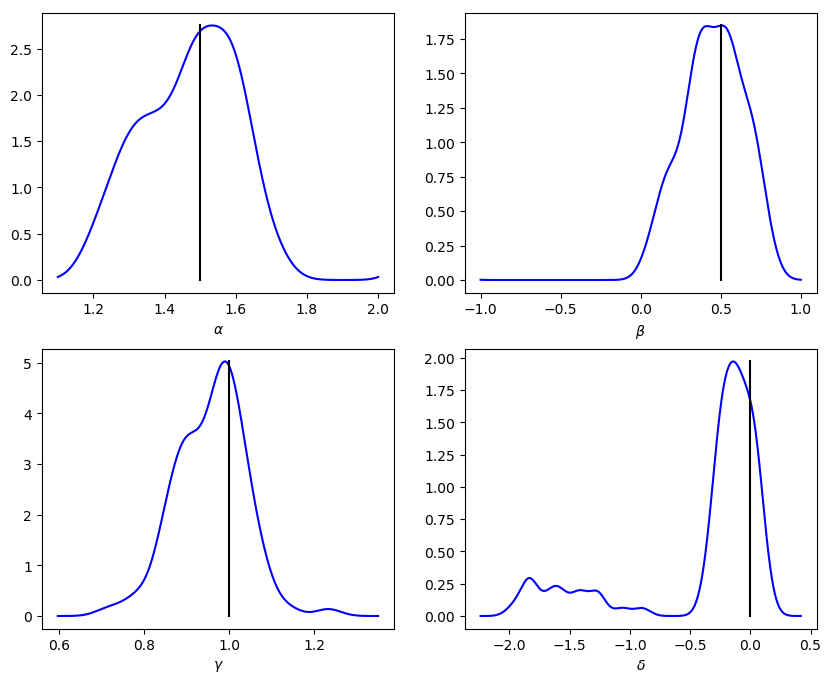

In [19]:
# simple DNN timeseries data
h1 = kde(posterior_timeseries_data[:,1]; boundary=(1.1,2))
h2 = kde(posterior_timeseries_data[:,2]; boundary=(-1,1))
h3 = kde(posterior_timeseries_data[:,3])
h4 = kde(posterior_timeseries_data[:,4])

PyPlot.figure(figsize=(10,8))
PyPlot.subplot(221)
PyPlot.plot(h1.x,h1.density, "b")
#PyPlot.plot(x_grid1,priordensity1, "g")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1.density)), "k")
PyPlot.xlabel(L"$α$")
PyPlot.subplot(222)
#PyPlot.plot(x_grid2,priordensity2, "g")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2.density)), "k")
PyPlot.xlabel(L"$β$")
PyPlot.subplot(223)
PyPlot.plot(h3.x,h3.density, "b")
#PyPlot.plot(x_grid3,priordensity3, "g")
PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3.density)), "k")
PyPlot.xlabel(L"$γ$")
PyPlot.subplot(224)
#PyPlot.plot(x_grid4,priordensity4, "g")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4.density)), "k")
PyPlot.xlabel(L"$δ$");

Plot posterior for transformed parameters. 

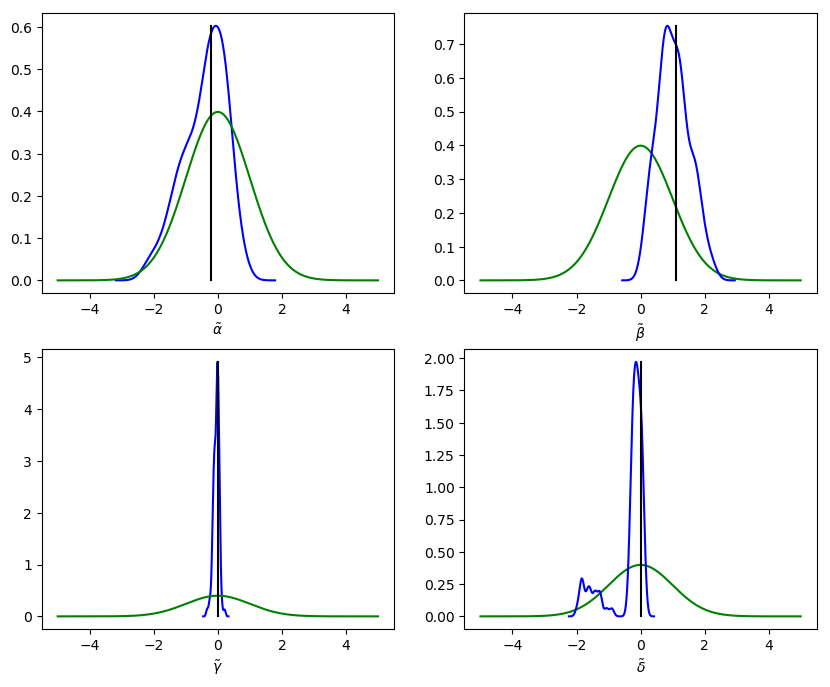

In [20]:
posterior_timeseries_data_tilde = zeros(size(posterior_timeseries_data))

for i = 1:size(posterior_summary_stats,1)
    posterior_timeseries_data_tilde[i,:] = map_parameters(posterior_timeseries_data[i,:])
end

h1 = kde(posterior_timeseries_data_tilde[:,1])
h2 = kde(posterior_timeseries_data_tilde[:,2])
h3 = kde(posterior_timeseries_data_tilde[:,3])
h4 = kde(posterior_timeseries_data_tilde[:,4])


PyPlot.figure(figsize=(10,8))
PyPlot.subplot(221)
PyPlot.plot(h1.x,h1.density, "b")
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot((θ_true_tilde[1], θ_true_tilde[1]), (0, maximum(h1.density)), "k")
PyPlot.xlabel(L"$\tilde{α}$")
PyPlot.subplot(222)
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot((θ_true_tilde[2], θ_true_tilde[2]), (0, maximum(h2.density)), "k")
PyPlot.xlabel(L"$\tilde{β}$")
PyPlot.subplot(223)
PyPlot.plot(h3.x,h3.density, "b")
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot((θ_true_tilde[3], θ_true_tilde[3]), (0, maximum(h3.density)), "k")
PyPlot.xlabel(L"$\tilde{γ}$")
PyPlot.subplot(224)
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot((θ_true_tilde[4], θ_true_tilde[4]), (0, maximum(h4.density)), "k")
PyPlot.xlabel(L"$\tilde{δ}$");

### Results using DeepSets 

#### Network info

Structure: 1000 (input) -> 100 -> 50 -> 10 (output inner), summation, then 10 (input outer) -> 100 -> 100 -> 50 -> 2 (output)

Number weights: 22214

Training time: 52312.34 sec. (14.53 h)

ABC runtime: 254.71 sec. (4.25 min)

Load results. 

In [21]:
loss_training_deepsets = Matrix(CSV.read("data/alpha stable/loss_vec_training_deepsets_1.csv"; allowmissing=:auto))
loss_val_deepsets = Matrix(CSV.read("data/alpha stable/loss_vec_val_deepsets_1.csv"; allowmissing=:auto))
predictions_deepsets = Matrix(CSV.read("data/alpha stable/predictions_deepsets_1.csv"; allowmissing=:auto))
posterior_deepsets = Matrix(CSV.read("data/alpha stable/abcrs_post_deepsets_1.csv"; allowmissing=:auto));

#### Network performance  

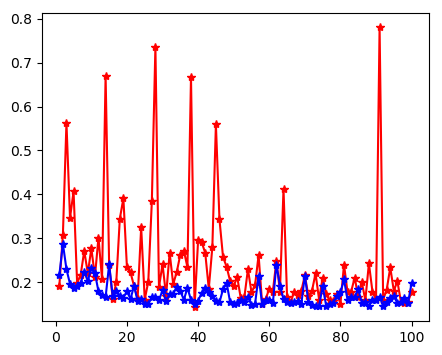

In [22]:
# plot training and val error
PyPlot.figure(figsize=(5,4))
PyPlot.plot(1:length(loss_training_deepsets), loss_training_deepsets[:], "*-r")
PyPlot.plot(1:length(loss_training_deepsets), loss_val_deepsets[:], "*-b");

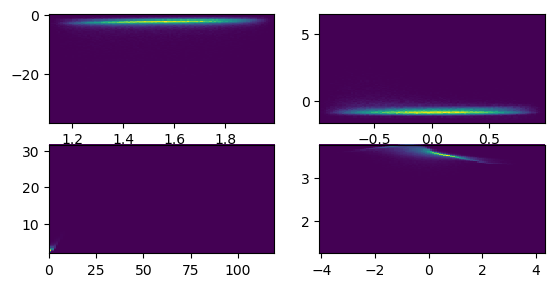

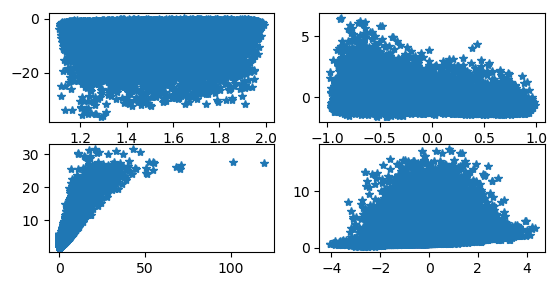

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fe9210715f8>

In [23]:
# plot predictions
# plot predictionsPyPlot.figure()
PyPlot.subplot(321)
PyPlot.plt[:hist2d](y_test[:,1], predictions_deepsets[:,1], bins=(100, 100))
PyPlot.subplot(322)
PyPlot.plt[:hist2d](y_test[:,2], predictions_deepsets[:,2], bins=(100, 100))
PyPlot.subplot(323)
PyPlot.plt[:hist2d](y_test[:,3], predictions_deepsets[:,3], bins=(100, 100))
PyPlot.subplot(324)
PyPlot.plt[:hist2d](y_test[:,4], predictions_dnn_timseries_data[:,4], bins=(100, 100))

# plot predictions
PyPlot.figure()
PyPlot.subplot(321)
PyPlot.plot(y_test[:,1], predictions_deepsets[:,1], "*")
PyPlot.subplot(322)
PyPlot.plot(y_test[:,2], predictions_deepsets[:,2], "*")
PyPlot.subplot(323)
PyPlot.plot(y_test[:,3], predictions_deepsets[:,3], "*")
PyPlot.subplot(324)
PyPlot.plot(y_test[:,4], predictions_deepsets[:,4], "*")

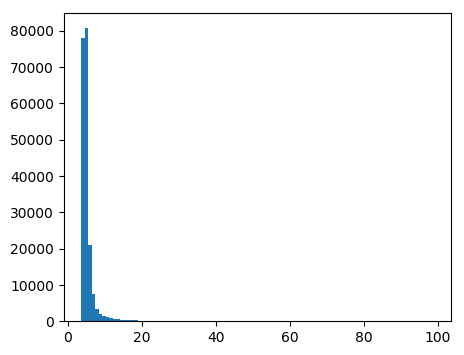

In [24]:
# check pred error
loss_test = sqrt.(sum((predictions_deepsets - y_test).^2, dims=2))

PyPlot.figure(figsize=(5,4))
h = PyPlot.plt[:hist](loss_test,100);

#### Posterior inference  

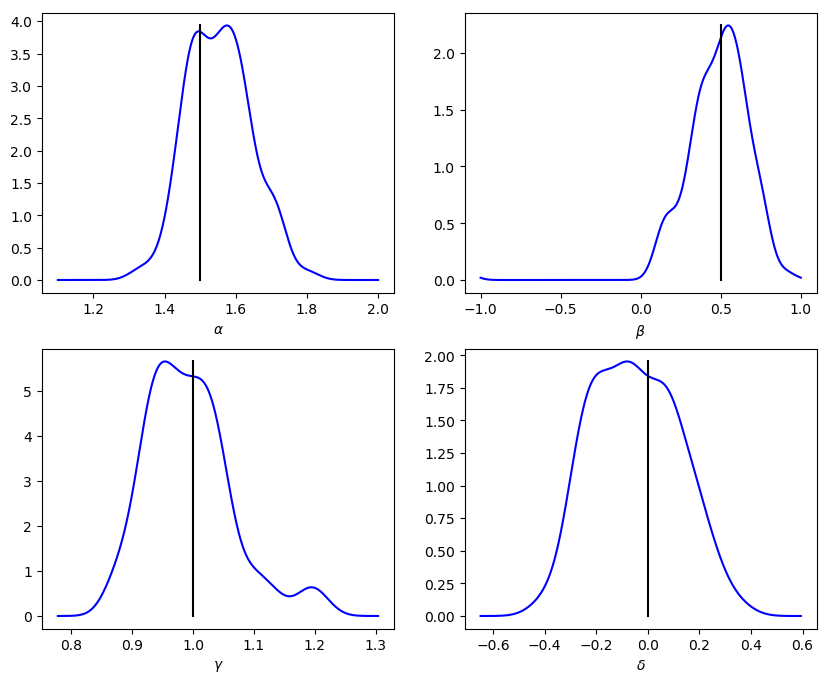

In [25]:
#  DNN deepsets

h1 = kde(posterior_deepsets[:,1]; boundary=(1.1,2))
h2 = kde(posterior_deepsets[:,2]; boundary=(-1,1))
h3 = kde(posterior_deepsets[:,3])
h4 = kde(posterior_deepsets[:,4])

PyPlot.figure(figsize=(10,8))
PyPlot.subplot(221)
PyPlot.plot(h1.x,h1.density, "b")
#PyPlot.plot(x_grid1,priordensity1, "g")
PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1.density)), "k")
PyPlot.xlabel(L"$α$")
PyPlot.subplot(222)
#PyPlot.plot(x_grid2,priordensity2, "g")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2.density)), "k")
PyPlot.xlabel(L"$β$")
PyPlot.subplot(223)
PyPlot.plot(h3.x,h3.density, "b")
#PyPlot.plot(x_grid3,priordensity3, "g")
PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3.density)), "k")
PyPlot.xlabel(L"$γ$")
PyPlot.subplot(224)
#PyPlot.plot(x_grid4,priordensity4, "g")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4.density)), "k")
PyPlot.xlabel(L"$δ$");

Plot posterior for transformed parameters. 

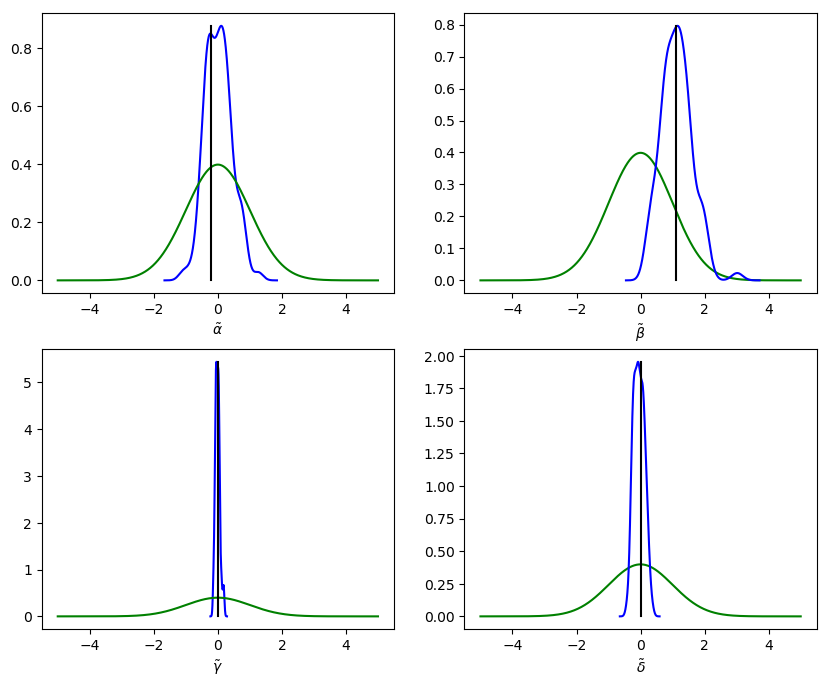

In [26]:
posterior_deepsets_tilde = zeros(size(posterior_deepsets))

for i = 1:size(posterior_summary_stats,1)
    posterior_deepsets_tilde[i,:] = map_parameters(posterior_deepsets[i,:])
end

h1 = kde(posterior_deepsets_tilde[:,1])
h2 = kde(posterior_deepsets_tilde[:,2])
h3 = kde(posterior_deepsets_tilde[:,3])
h4 = kde(posterior_deepsets_tilde[:,4])


PyPlot.figure(figsize=(10,8))
PyPlot.subplot(221)
PyPlot.plot(h1.x,h1.density, "b")
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot((θ_true_tilde[1], θ_true_tilde[1]), (0, maximum(h1.density)), "k")
PyPlot.xlabel(L"$\tilde{α}$")
PyPlot.subplot(222)
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot(h2.x,h2.density, "b")
PyPlot.plot((θ_true_tilde[2], θ_true_tilde[2]), (0, maximum(h2.density)), "k")
PyPlot.xlabel(L"$\tilde{β}$")
PyPlot.subplot(223)
PyPlot.plot(h3.x,h3.density, "b")
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot((θ_true_tilde[3], θ_true_tilde[3]), (0, maximum(h3.density)), "k")
PyPlot.xlabel(L"$\tilde{γ}$")
PyPlot.subplot(224)
PyPlot.plot(grid_prior,priordensity, "g")
PyPlot.plot(h4.x,h4.density, "b")
PyPlot.plot((θ_true_tilde[4], θ_true_tilde[4]), (0, maximum(h4.density)), "k")
PyPlot.xlabel(L"$\tilde{δ}$");

## Posterior inference results 

In [4]:
(α_true, β_true, γ_true, δ_true) = θ_true
θ_true_tilde = map_parameters(θ_true);

println("True paramter values:")
println(α_true) 
println(β_true) 
println(γ_true) 
println(δ_true) 

println("True paramter values (tilde space):")
println(θ_true_tilde) 


True paramter values:
1.5
0.5
1.0
0.0
True paramter values (tilde space):
[-0.223144, 1.09861, 0.0, 0.0]


Set up.

## ABC

Posterior mean loss and true paramter loss for ABC.

In [13]:
nbr_posterior_samples = 100

posterior = Matrix(CSV.read("data/alpha stable/posteriors_multiple_data_sets_abcrs.csv"; allowmissing=:auto))

α_hat = mean(posterior[1:4:end,:],dims=1)
β_hat = mean(posterior[2:4:end,:],dims=1)
γ_hat = mean(posterior[3:4:end,:],dims=1)
δ_hat = mean(posterior[4:4:end,:],dims=1)


# loss

println("mean of posterior mean:")
println(mean(α_hat))
println(mean(β_hat))
println(mean(γ_hat))
println(mean(δ_hat))
println(" ")

println("posterior mean loss:")
println(sqrt(mean((α_hat.-α_true).^2)))
println(sqrt(mean((β_hat.-β_true).^2)))
println(sqrt(mean((γ_hat.-γ_true).^2)))
println(sqrt(mean((δ_hat.-δ_true).^2)))

println("multivar RMSE:")
sqrt(mean(sum(([α_hat; β_hat; γ_hat; δ_hat] .- [α_true; β_true; γ_true; δ_true]).^2, dims = 1)))



┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/MKiwM/src/CSV.jl:157


mean of posterior mean:
1.536440986846459
0.3202316832073629
1.4904383995719614
0.0025525928576703096
 
posterior mean loss:
0.04117142188868422
0.18584595289267294
0.6107953803111068
0.060622354992859014
multivar RMSE:


0.6426350991979752

In [14]:
PyPlot.figure(figsize=(10,8))

for i = 1:4:4*5

    h1 = kde(posterior[i,:]; boundary=(1.1,2))
    h2 = kde(posterior[i+1,:]; boundary=(-1,1))
    h3 = kde(posterior[i+2,:])
    h4 = kde(posterior[i+3,:])

    PyPlot.subplot(221)
    PyPlot.plot(h1.x,h1.density)
    #PyPlot.plot(x_grid1,priordensity1, "g")
    PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1.density)), "k")
    PyPlot.xlabel(L"$α$")
    PyPlot.subplot(222)
    #PyPlot.plot(x_grid2,priordensity2, "g")
    PyPlot.plot(h2.x,h2.density)
    PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2.density)), "k")
    PyPlot.xlabel(L"$β$")
    PyPlot.subplot(223)
    PyPlot.plot(h3.x,h3.density)
    #PyPlot.plot(x_grid3,priordensity3, "g")
    PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3.density)), "k")
    PyPlot.xlabel(L"$γ$")
    PyPlot.subplot(224)
    #PyPlot.plot(x_grid4,priordensity4, "g")
    PyPlot.plot(h4.x,h4.density)
    PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4.density)), "k")
    PyPlot.xlabel(L"$δ$");
end 

Figure(PyObject <Figure size 1000x800 with 4 Axes>)

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[15]:66
└ @ Core In[15]:66
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[15]:94
└ @ Core In[15]:94
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[15]:122
└ @ Core In[15]:122
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[15]:149
└ @ Core In[15]:149


Figure(PyObject <Figure size 1000x800 with 4 Axes>)

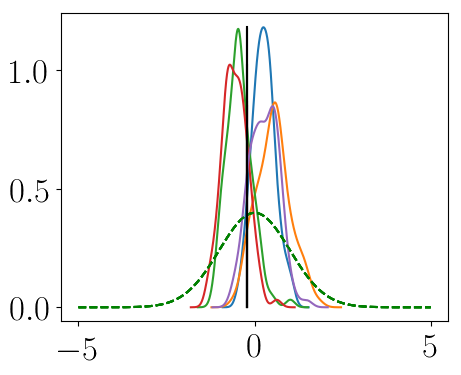

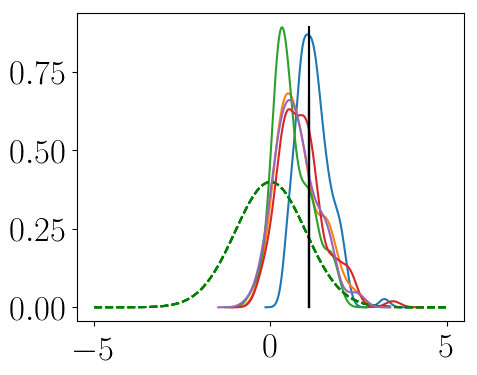

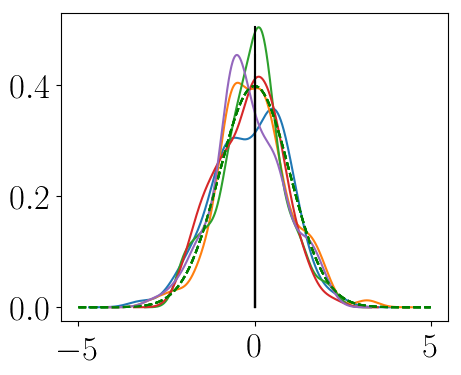

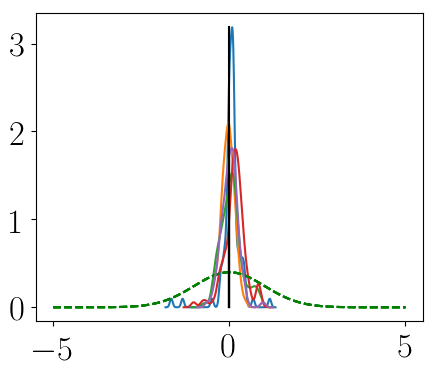

In [15]:

PyPlot.figure(figsize=(10,8))

for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.subplot(221)
    PyPlot.plot(h1.x,h1.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[1], θ_true_tilde[1]), (0, maximum(h1.density)), "k")
    PyPlot.xlabel(L"$\tilde{α}$")
    PyPlot.subplot(222)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h2.x,h2.density)
    PyPlot.plot((θ_true_tilde[2], θ_true_tilde[2]), (0, maximum(h2.density)), "k")
    PyPlot.xlabel(L"$\tilde{β}$")
    PyPlot.subplot(223)
    PyPlot.plot(h3.x,h3.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[3], θ_true_tilde[3]), (0, maximum(h3.density)), "k")
    PyPlot.xlabel(L"$\tilde{γ}$")
    PyPlot.subplot(224)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h4.x,h4.density)
    PyPlot.plot((θ_true_tilde[4], θ_true_tilde[4]), (0, maximum(h4.density)), "k")
    PyPlot.xlabel(L"$\tilde{δ}$");

end 



PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(h1.x,h1.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[1], θ_true_tilde[1]), (0, maximum(h1.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 

PyPlot.savefig("figures/res_alpha_stable_alpha_handpicked.eps", format="eps", dpi=1000)


PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()

for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h2.x,h2.density)
    PyPlot.plot((θ_true_tilde[2], θ_true_tilde[2]), (0, maximum(h2.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 

PyPlot.savefig("figures/res_alpha_stable_beta_handpicked.eps", format="eps", dpi=1000)


PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()

for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(h3.x,h3.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[3], θ_true_tilde[3]), (0, maximum(h3.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 

PyPlot.savefig("figures/res_alpha_stable_gamma_handpicked.eps", format="eps", dpi=1000)


PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h4.x,h4.density)
    PyPlot.plot((θ_true_tilde[4], θ_true_tilde[4]), (0, maximum(h4.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 
PyPlot.savefig("figures/res_alpha_stable_delta_handpicked.eps", format="eps", dpi=1000)


## MLP datasize 1

Posterior mean loss and true paramter loss for small MLP.

In [16]:
nbr_posterior_samples = 100

datasize = 1
network = "large"

posterior = Matrix(CSV.read("data/alpha stable/posteriors_multiple_data_sets_mlp_"*string(datasize)*"_"*network*".csv"; allowmissing=:auto))

α_hat = mean(posterior[1:4:end,:],dims=1)
β_hat = mean(posterior[2:4:end,:],dims=1)
γ_hat = mean(posterior[3:4:end,:],dims=1)
δ_hat = mean(posterior[4:4:end,:],dims=1)


# loss

println("mean of posterior mean:")
println(mean(α_hat))
println(mean(β_hat))
println(mean(γ_hat))
println(mean(δ_hat))
println(" ")

println("posterior mean loss:")
println(sqrt(mean((α_hat.-α_true).^2)))
println(sqrt(mean((β_hat.-β_true).^2)))
println(sqrt(mean((γ_hat.-γ_true).^2)))
println(sqrt(mean((δ_hat.-δ_true).^2)))


println("multivar RMSE:")
sqrt(mean(sum(([α_hat; β_hat; γ_hat; δ_hat] .- [α_true; β_true; γ_true; δ_true]).^2, dims = 1)))


mean of posterior mean:


┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/MKiwM/src/CSV.jl:157


1.471332571953761
0.37143585089343384
1.0160755908753478
-0.04722919151397253
 
posterior mean loss:
0.0340907469242105
0.13269054084383805
0.023369196826960224
0.060942795185028216
multivar RMSE:


0.1517534259928992

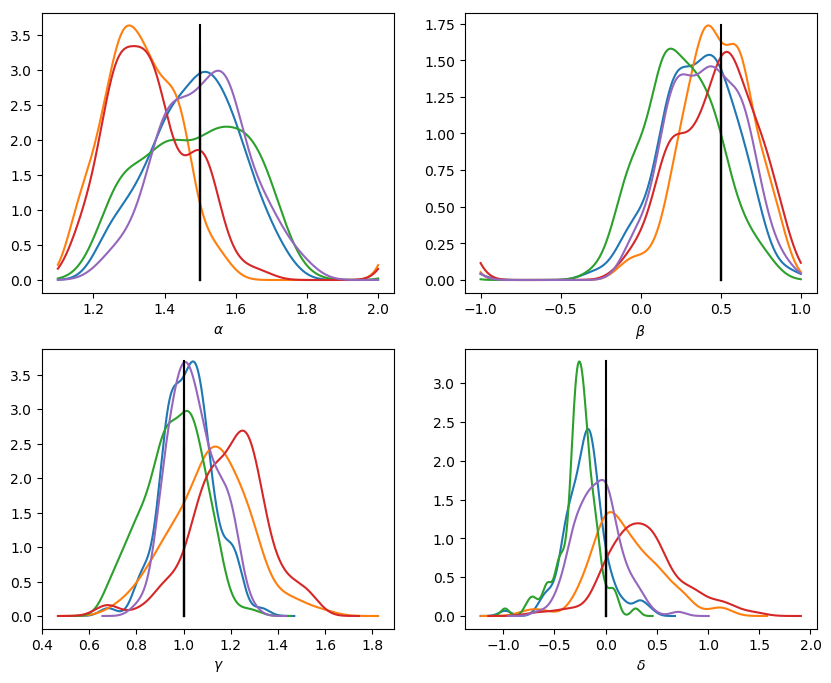

In [15]:
PyPlot.figure(figsize=(10,8))

for i = 1:4:4*5

    h1 = kde(posterior[i,:]; boundary=(1.1,2))
    h2 = kde(posterior[i+1,:]; boundary=(-1,1))
    h3 = kde(posterior[i+2,:])
    h4 = kde(posterior[i+3,:])

    PyPlot.subplot(221)
    PyPlot.plot(h1.x,h1.density)
    #PyPlot.plot(x_grid1,priordensity1, "g")
    PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1.density)), "k")
    PyPlot.xlabel(L"$α$")
    PyPlot.subplot(222)
    #PyPlot.plot(x_grid2,priordensity2, "g")
    PyPlot.plot(h2.x,h2.density)
    PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2.density)), "k")
    PyPlot.xlabel(L"$β$")
    PyPlot.subplot(223)
    PyPlot.plot(h3.x,h3.density)
    #PyPlot.plot(x_grid3,priordensity3, "g")
    PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3.density)), "k")
    PyPlot.xlabel(L"$γ$")
    PyPlot.subplot(224)
    #PyPlot.plot(x_grid4,priordensity4, "g")
    PyPlot.plot(h4.x,h4.density)
    PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4.density)), "k")
    PyPlot.xlabel(L"$δ$");
end 

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[17]:66
└ @ Core In[17]:66
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[17]:94
└ @ Core In[17]:94
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[17]:122
└ @ Core In[17]:122
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[17]:149
└ @ Core In[17]:149


Figure(PyObject <Figure size 1000x800 with 4 Axes>)

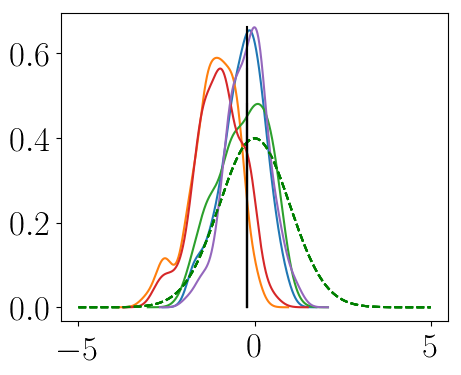

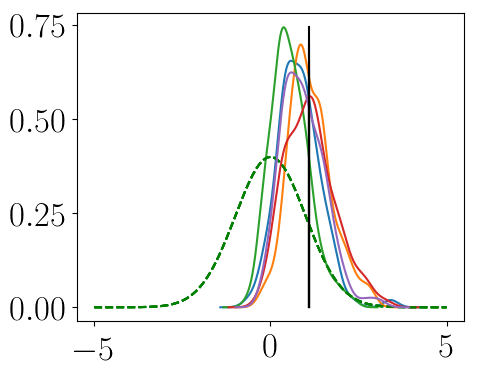

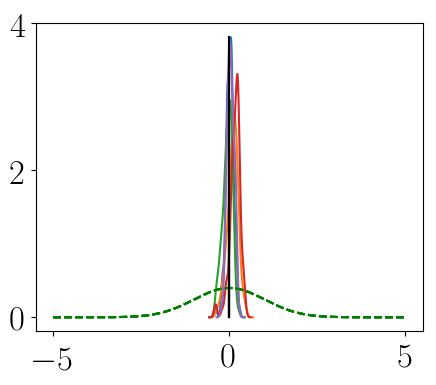

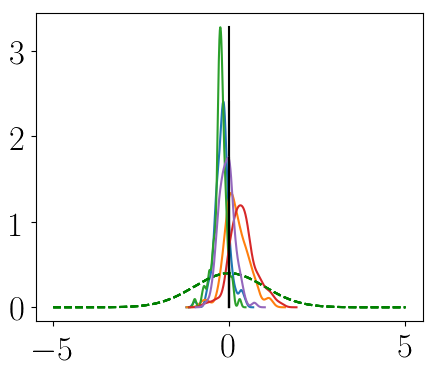

In [17]:

PyPlot.figure(figsize=(10,8))

for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.subplot(221)
    PyPlot.plot(h1.x,h1.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[1], θ_true_tilde[1]), (0, maximum(h1.density)), "k")
    PyPlot.xlabel(L"$\tilde{α}$")
    PyPlot.subplot(222)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h2.x,h2.density)
    PyPlot.plot((θ_true_tilde[2], θ_true_tilde[2]), (0, maximum(h2.density)), "k")
    PyPlot.xlabel(L"$\tilde{β}$")
    PyPlot.subplot(223)
    PyPlot.plot(h3.x,h3.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[3], θ_true_tilde[3]), (0, maximum(h3.density)), "k")
    PyPlot.xlabel(L"$\tilde{γ}$")
    PyPlot.subplot(224)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h4.x,h4.density)
    PyPlot.plot((θ_true_tilde[4], θ_true_tilde[4]), (0, maximum(h4.density)), "k")
    PyPlot.xlabel(L"$\tilde{δ}$");

end 



PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(h1.x,h1.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[1], θ_true_tilde[1]), (0, maximum(h1.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 

PyPlot.savefig("figures/res_alpha_stable_alpha_mlp_"*string(datasize)*"_"*network*".eps", format="eps", dpi=1000)


PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()

for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h2.x,h2.density)
    PyPlot.plot((θ_true_tilde[2], θ_true_tilde[2]), (0, maximum(h2.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 

PyPlot.savefig("figures/res_alpha_stable_beta_mlp_"*string(datasize)*"_"*network*".eps", format="eps", dpi=1000)


PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()

for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(h3.x,h3.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[3], θ_true_tilde[3]), (0, maximum(h3.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 

PyPlot.savefig("figures/res_alpha_stable_gamma_mlp_"*string(datasize)*"_"*network*".eps", format="eps", dpi=1000)


PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h4.x,h4.density)
    PyPlot.plot((θ_true_tilde[4], θ_true_tilde[4]), (0, maximum(h4.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 
PyPlot.savefig("figures/res_alpha_stable_delta_mlp_"*string(datasize)*"_"*network*".eps", format="eps", dpi=1000)


## DNN with pre-processing 

Posterior mean loss and true paramter loss for timeseries network.

In [18]:
nbr_posterior_samples = 100

datasize = 1

posterior = Matrix(CSV.read("data/alpha stable/posteriors_multiple_data_sets_mlp_preprocessing_"*string(datasize)*".csv"; allowmissing=:auto))

#posterior = Matrix(CSV.read("data/alpha stable/posteriors_multiple_data_sets_dnn_timseries_data_2.csv"))
        
α_hat = mean(posterior[1:4:end,:],dims=1)
β_hat = mean(posterior[2:4:end,:],dims=1)
γ_hat = mean(posterior[3:4:end,:],dims=1)
δ_hat = mean(posterior[4:4:end,:],dims=1)


# loss

println("mean of posterior mean:")
println(mean(α_hat))
println(mean(β_hat))
println(mean(γ_hat))
println(mean(δ_hat))
println(" ")

println("posterior mean loss:")
println(sqrt(mean((α_hat.-α_true).^2)))
println(sqrt(mean((β_hat.-β_true).^2)))
println(sqrt(mean((γ_hat.-γ_true).^2)))
println(sqrt(mean((δ_hat.-δ_true).^2)))

println("multivar RMSE:")
sqrt(mean(sum(([α_hat; β_hat; γ_hat; δ_hat] .- [α_true; β_true; γ_true; δ_true]).^2, dims = 1)))


┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/MKiwM/src/CSV.jl:157


mean of posterior mean:
1.5334957984512172
0.4790090483284189
1.008261891294382
-0.021691561120935576
 
posterior mean loss:
0.0397195186433914
0.03008707991528657
0.022085602224551564
0.03973618543085208
multivar RMSE:


0.0674508027921665

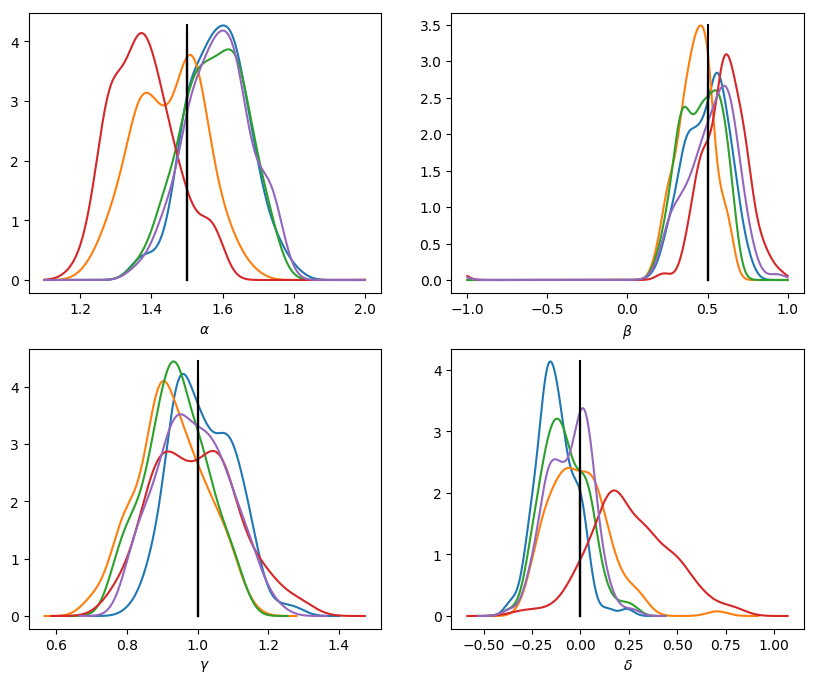

In [20]:
PyPlot.figure(figsize=(10,8))

for i = 1:4:4*5

    h1 = kde(posterior[i,:]; boundary=(1.1,2))
    h2 = kde(posterior[i+1,:]; boundary=(-1,1))
    h3 = kde(posterior[i+2,:])
    h4 = kde(posterior[i+3,:])

    PyPlot.subplot(221)
    PyPlot.plot(h1.x,h1.density)
    #PyPlot.plot(x_grid1,priordensity1, "g")
    PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1.density)), "k")
    PyPlot.xlabel(L"$α$")
    PyPlot.subplot(222)
    #PyPlot.plot(x_grid2,priordensity2, "g")
    PyPlot.plot(h2.x,h2.density)
    PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2.density)), "k")
    PyPlot.xlabel(L"$β$")
    PyPlot.subplot(223)
    PyPlot.plot(h3.x,h3.density)
    #PyPlot.plot(x_grid3,priordensity3, "g")
    PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3.density)), "k")
    PyPlot.xlabel(L"$γ$")
    PyPlot.subplot(224)
    #PyPlot.plot(x_grid4,priordensity4, "g")
    PyPlot.plot(h4.x,h4.density)
    PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4.density)), "k")
    PyPlot.xlabel(L"$δ$");
end 

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[19]:66
└ @ Core In[19]:66
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[19]:94
└ @ Core In[19]:94
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[19]:122
└ @ Core In[19]:122
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[19]:149
└ @ Core In[19]:149


Figure(PyObject <Figure size 1000x800 with 4 Axes>)

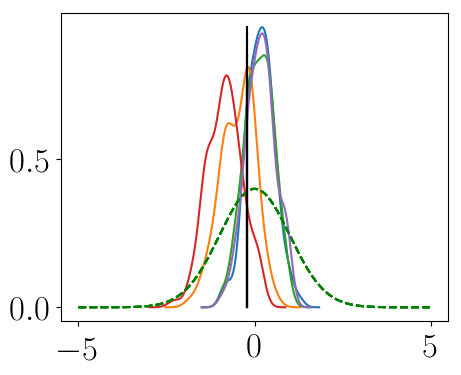

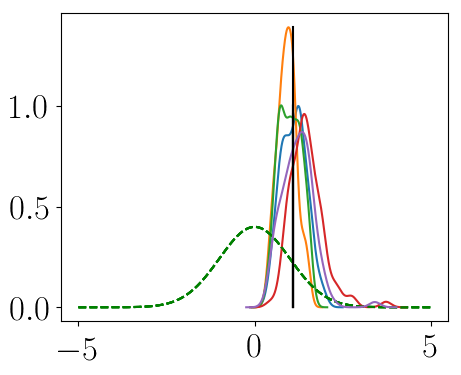

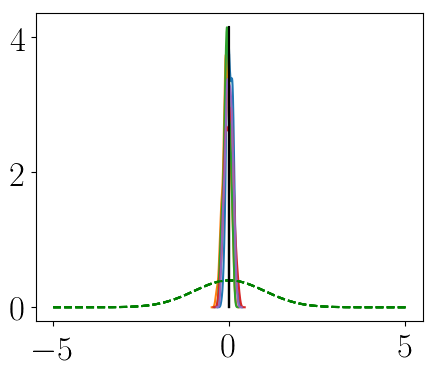

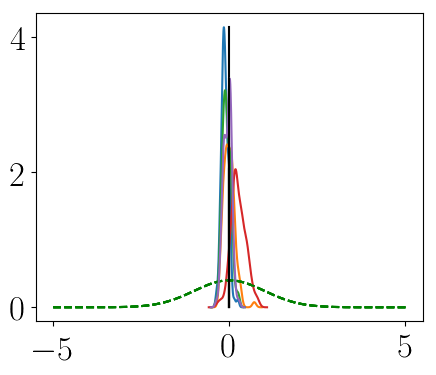

In [19]:

PyPlot.figure(figsize=(10,8))

for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.subplot(221)
    PyPlot.plot(h1.x,h1.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[1], θ_true_tilde[1]), (0, maximum(h1.density)), "k")
    PyPlot.xlabel(L"$\tilde{α}$")
    PyPlot.subplot(222)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h2.x,h2.density)
    PyPlot.plot((θ_true_tilde[2], θ_true_tilde[2]), (0, maximum(h2.density)), "k")
    PyPlot.xlabel(L"$\tilde{β}$")
    PyPlot.subplot(223)
    PyPlot.plot(h3.x,h3.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[3], θ_true_tilde[3]), (0, maximum(h3.density)), "k")
    PyPlot.xlabel(L"$\tilde{γ}$")
    PyPlot.subplot(224)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h4.x,h4.density)
    PyPlot.plot((θ_true_tilde[4], θ_true_tilde[4]), (0, maximum(h4.density)), "k")
    PyPlot.xlabel(L"$\tilde{δ}$");

end 



PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(h1.x,h1.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[1], θ_true_tilde[1]), (0, maximum(h1.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 

PyPlot.savefig("figures/res_alpha_stable_alpha_mlp_pre"*string(datasize)*".eps", format="eps", dpi=1000)


PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()

for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h2.x,h2.density)
    PyPlot.plot((θ_true_tilde[2], θ_true_tilde[2]), (0, maximum(h2.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 

PyPlot.savefig("figures/res_alpha_stable_beta_mlp_pre"*string(datasize)*".eps", format="eps", dpi=1000)


PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()

for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(h3.x,h3.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[3], θ_true_tilde[3]), (0, maximum(h3.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 

PyPlot.savefig("figures/res_alpha_stable_gamma_mlp_pre"*string(datasize)*".eps", format="eps", dpi=1000)


PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h4.x,h4.density)
    PyPlot.plot((θ_true_tilde[4], θ_true_tilde[4]), (0, maximum(h4.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 
PyPlot.savefig("figures/res_alpha_stable_delta_mlp_pre"*string(datasize)*".eps", format="eps", dpi=1000)


## Deepsets

Posterior mean loss and true paramter loss for Deepsets.

In [10]:
nbr_posterior_samples = 100

datasize = 1

posterior = Matrix(CSV.read("data/alpha stable/posteriors_multiple_data_sets_deepsets_"*string(datasize)*".csv"; allowmissing=:auto))

α_hat = mean(posterior[1:4:end,:],dims=1)
β_hat = mean(posterior[2:4:end,:],dims=1)
γ_hat = mean(posterior[3:4:end,:],dims=1)
δ_hat = mean(posterior[4:4:end,:],dims=1)


# loss

println("mean of posterior mean:")
println(mean(α_hat))
println(mean(β_hat))
println(mean(γ_hat))
println(mean(δ_hat))
println(" ")

println("posterior mean loss:")
println(sqrt(mean((α_hat.-α_true).^2)))
println(sqrt(mean((β_hat.-β_true).^2)))
println(sqrt(mean((γ_hat.-γ_true).^2)))
println(sqrt(mean((δ_hat.-δ_true).^2)))

println("multivar RMSE:")
sqrt(mean(sum(([α_hat; β_hat; γ_hat; δ_hat] .- [α_true; β_true; γ_true; δ_true]).^2, dims = 1)))


mean of posterior mean:
1.4994627269632377
0.47905959355450506
1.0005791178837873
-0.0106646818621853
 
posterior mean loss:
0.017947641840665763
0.0338968404812147
0.019304338193782418
0.03185989693152823
multivar RMSE:


┌ Warning: `allowmissing` is a deprecated keyword argument
└ @ CSV /home/samuel/.julia/packages/CSV/MKiwM/src/CSV.jl:157


0.05346797310388024

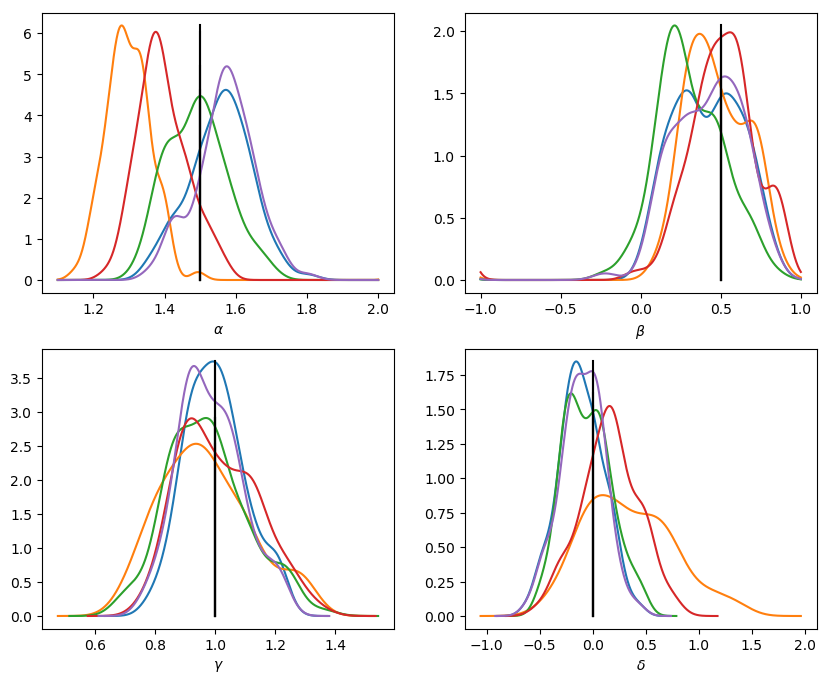

In [66]:
PyPlot.figure(figsize=(10,8))

for i = 1:4:4*5

    h1 = kde(posterior[i,:]; boundary=(1.1,2))
    h2 = kde(posterior[i+1,:]; boundary=(-1,1))
    h3 = kde(posterior[i+2,:])
    h4 = kde(posterior[i+3,:])

    PyPlot.subplot(221)
    PyPlot.plot(h1.x,h1.density)
    #PyPlot.plot(x_grid1,priordensity1, "g")
    PyPlot.plot((θ_true[1], θ_true[1]), (0, maximum(h1.density)), "k")
    PyPlot.xlabel(L"$α$")
    PyPlot.subplot(222)
    #PyPlot.plot(x_grid2,priordensity2, "g")
    PyPlot.plot(h2.x,h2.density)
    PyPlot.plot((θ_true[2], θ_true[2]), (0, maximum(h2.density)), "k")
    PyPlot.xlabel(L"$β$")
    PyPlot.subplot(223)
    PyPlot.plot(h3.x,h3.density)
    #PyPlot.plot(x_grid3,priordensity3, "g")
    PyPlot.plot((θ_true[3], θ_true[3]), (0, maximum(h3.density)), "k")
    PyPlot.xlabel(L"$γ$")
    PyPlot.subplot(224)
    #PyPlot.plot(x_grid4,priordensity4, "g")
    PyPlot.plot(h4.x,h4.density)
    PyPlot.plot((θ_true[4], θ_true[4]), (0, maximum(h4.density)), "k")
    PyPlot.xlabel(L"$δ$");
end 

┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[11]:66
└ @ Core In[11]:66
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[11]:94
└ @ Core In[11]:94
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[11]:122
└ @ Core In[11]:122
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[11]:149
└ @ Core In[11]:149


Figure(PyObject <Figure size 1000x800 with 4 Axes>)

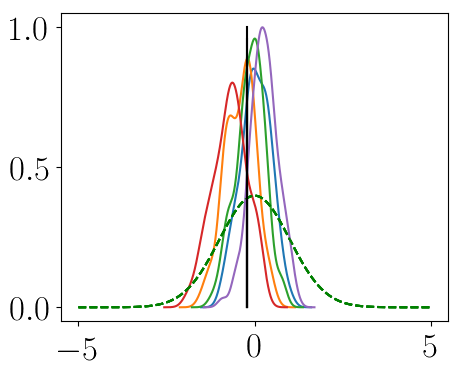

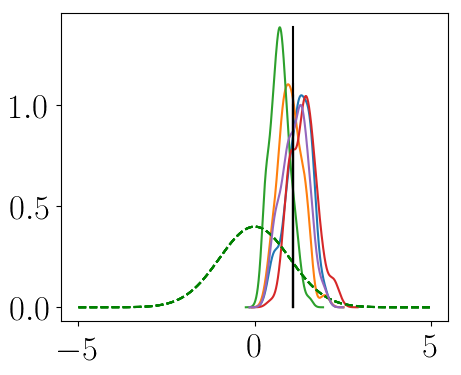

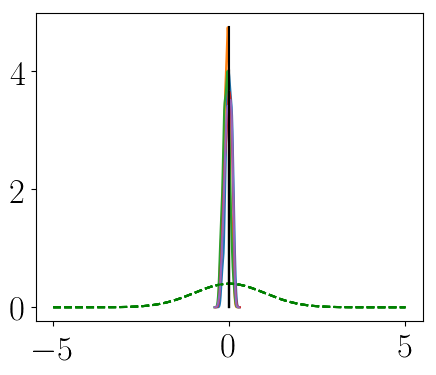

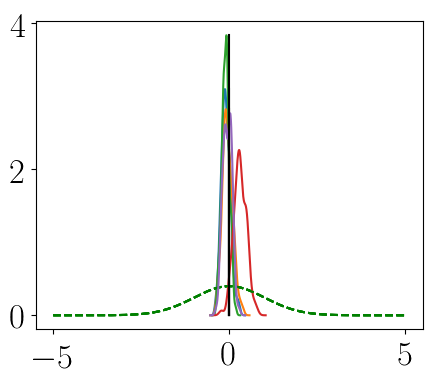

In [11]:

PyPlot.figure(figsize=(10,8))

for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.subplot(221)
    PyPlot.plot(h1.x,h1.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[1], θ_true_tilde[1]), (0, maximum(h1.density)), "k")
    PyPlot.xlabel(L"$\tilde{α}$")
    PyPlot.subplot(222)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h2.x,h2.density)
    PyPlot.plot((θ_true_tilde[2], θ_true_tilde[2]), (0, maximum(h2.density)), "k")
    PyPlot.xlabel(L"$\tilde{β}$")
    PyPlot.subplot(223)
    PyPlot.plot(h3.x,h3.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[3], θ_true_tilde[3]), (0, maximum(h3.density)), "k")
    PyPlot.xlabel(L"$\tilde{γ}$")
    PyPlot.subplot(224)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h4.x,h4.density)
    PyPlot.plot((θ_true_tilde[4], θ_true_tilde[4]), (0, maximum(h4.density)), "k")
    PyPlot.xlabel(L"$\tilde{δ}$");

end 



PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(h1.x,h1.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[1], θ_true_tilde[1]), (0, maximum(h1.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 

PyPlot.savefig("figures/res_alpha_stable_alpha_deepsets"*string(datasize)*".eps", format="eps", dpi=1000)


PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()

for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h2.x,h2.density)
    PyPlot.plot((θ_true_tilde[2], θ_true_tilde[2]), (0, maximum(h2.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 

PyPlot.savefig("figures/res_alpha_stable_beta_deepsets"*string(datasize)*".eps", format="eps", dpi=1000)


PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()

for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(h3.x,h3.density)
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot((θ_true_tilde[3], θ_true_tilde[3]), (0, maximum(h3.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 

PyPlot.savefig("figures/res_alpha_stable_gamma_deepsets"*string(datasize)*".eps", format="eps", dpi=1000)


PyPlot.figure(figsize=(5,4))
ax = PyPlot.axes()
for i = 1:4:4*5

    posterior_temp = Array(posterior[i:i+3,:]')
    
    posterior_temp_tilde = zeros(size(posterior_temp))

    for i = 1:nbr_posterior_samples
        posterior_temp_tilde[i,:] = map_parameters(posterior_temp[i,:])
    end

    h1 = kde(posterior_temp_tilde[:,1])
    h2 = kde(posterior_temp_tilde[:,2])
    h3 = kde(posterior_temp_tilde[:,3])
    h4 = kde(posterior_temp_tilde[:,4])
    
    PyPlot.plot(grid_prior,priordensity, "--g")
    PyPlot.plot(h4.x,h4.density)
    PyPlot.plot((θ_true_tilde[4], θ_true_tilde[4]), (0, maximum(h4.density)), "k")

end 
ax[:tick_params]("both",labelsize=25) 
PyPlot.savefig("figures/res_alpha_stable_delta_deepsets"*string(datasize)*".eps", format="eps", dpi=1000)
